<a href="https://colab.research.google.com/github/bddonoso/prtueba/blob/master/modulo_3_sesion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

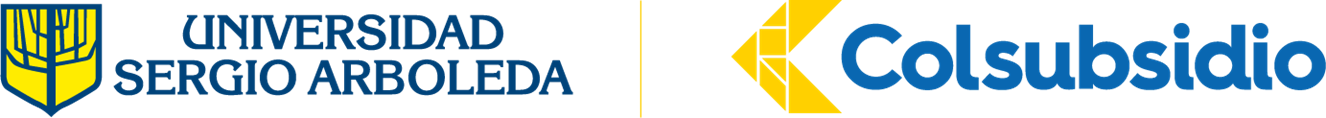

# Decision trees

El objetivo de este notebook es conocer los conceptos básicos de los modelos de clasificación, utilizando de base la construcción de árboles de clasificación.
Se usará la base de datos iris. Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x


## Árbol de clasificación

'Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features'
[scikit learn Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

Librerias



In [ ]:
# librerias para el modelo de clasificación
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# librerias de manejo de datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# librerias para la evaluación del modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# libreria para llamar la base de datos
from sklearn.datasets import load_iris

from math import*

### Exploración de datos

A continuación, se explora la base iris. La base de datos Iris es un conjunto de datos clásico en aprendizaje automático que contiene 150 registros de flores, con cuatro características numéricas: largo y ancho de sépalo, y largo y ancho de pétalo. Cada flor está clasificada en una de tres especies: Iris setosa, Iris versicolor e Iris virginica. Es ampliamente utilizada para tareas de clasificación y visualización de datos.

In [ ]:
## cargue de la base de datos
iris = load_iris()

In [ ]:
# información de la base
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Exploración de los datos. A continuación se presentan las medidas de cada una de las flores.

In [ ]:
#iris
DFiris = pd.DataFrame(iris.data, columns=iris.feature_names )
DFiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


A continuación se presenta la clasificación de cada una de las flores en las diferentes categorias.

| Clase | Especie             |
| ----- | ------------------- |
| 0     | **Iris setosa**     |
| 1     | **Iris versicolor** |
| 2     | **Iris virginica**  |


In [ ]:
## categoria de cada una de las flores
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Grafica de datos inicial

Solo se seleccionan, 2 características para poder construir el gráfico. En este caso se toma: 1. petal length (cm), 2. petal width (cm)

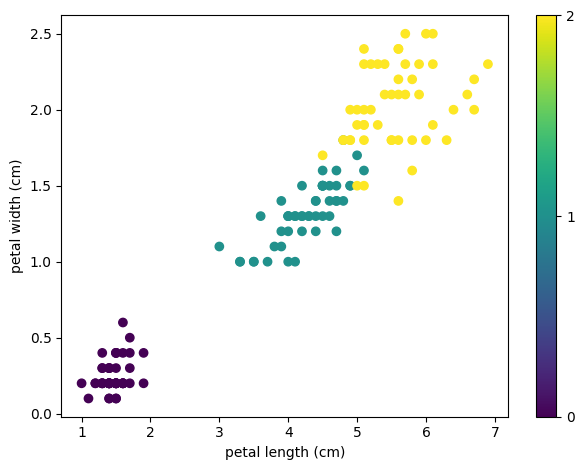

In [ ]:
# selección de la variable petal length
x_index = 2
# selección de la variable petal width
y_index = 3

## configuración del gráfico
plt.figure()
### scatter es el de puntos(x,y)
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
## configuración barra de color
plt.colorbar(ticks=[0, 1, 2])

# nombres de ejes
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## **Creación del modelo**
Inicialmente se tiene un árbol de profundidad 1, indica solo se hace un corte para separar las categórias

In [ ]:
## se estan evaluando solo las dos primeras variables (1. petal length (cm), 2. petal width (cm))
arbol = DecisionTreeClassifier(max_depth=1, random_state=42)
# vamos a usar un árbol de profundidad 1, random_state asegura siempre genere los mismos resultados

In [ ]:
arbol.fit(iris.data[:,[2,3]], iris.target) # entrenamiento del árbol

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(0.5, 0.75, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.625, 0.5, '  False')]

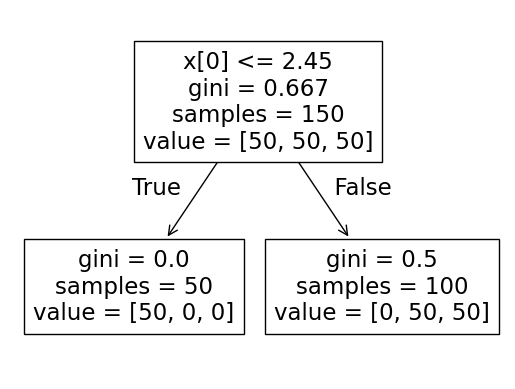

In [ ]:
## gráfica del modelo
tree.plot_tree(arbol)

Esto indica que si se divide la muestra de datos por la variable petal length (cm), se podría tener una categoría con los de valor menor a 2.45, y la otra con los de valor mayor a 2.45.
    
.  
Para mejorar el rendimiento del modelo se aumenta la profundidad a 2.

In [ ]:
# clasificador solo con una selección de los datos
arbol1 = DecisionTreeClassifier(max_depth=2, random_state=42) # vamos a usar un árbol de profundidad 2
arbol1.fit(iris.data[:,[2,3]], iris.target) # entrenamiento del árbol

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

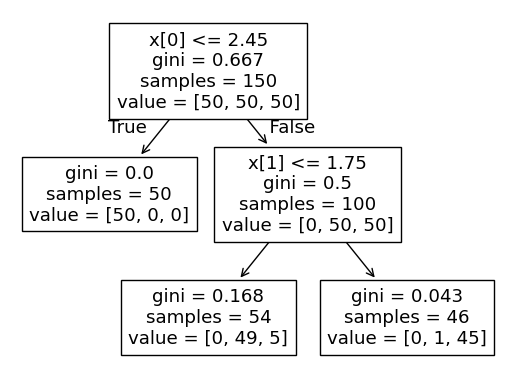

In [ ]:
# gráfico nuevo árbol
tree.plot_tree(arbol1)

## Observación de resultados del modelo
Este procedimiento, solo tiene el objetivo de organizar los datos para ver los cortes generados por el árbol.

In [ ]:
## creción de datos para ver cortes
t = np.arange(1,8,1)
t1 = np.arange(0,4,1)

In [ ]:
#lista de datos para gráficar sobre eje X
t

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
#lista de datos para gráficar sobre eje Y
t1

array([0, 1, 2, 3])

In [ ]:
# corte 1
y1 = np.linspace(2.45, 2.45, len(t1))
y1

array([2.45, 2.45, 2.45, 2.45])

In [ ]:
# corte 2
y2 = np.linspace(1.75, 1.75, len(t))
y2

array([1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75])

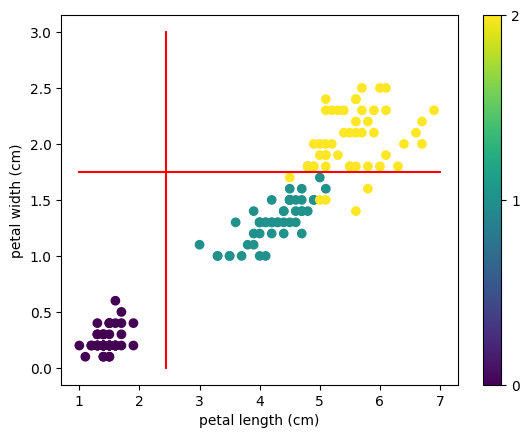

In [ ]:
plt.figure()
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
#plt.tight_layout()

## limite 1
plt.plot(y1, t1, color='r')
## limite 2
plt.plot(t, y2, color='r')

plt.show()

En la gráfica anterior se puede observar como divide por categórias, acorde a los cortes que propone el árbol de clasificación.

Revisión de predicciones. El siguiente sería un ejemplo donde se desea predecir la categoría de una flor con dimensiones:
 1. petal length (cm): 7
 2. petal width (cm): 2

 Pertenecará a la categoría 2

In [ ]:
arbol1.predict([[7,2]])

array([2])

### **Ejercicio 1**

Evaluar el resultado del modelo si se utilizaran solo las variables (sepal length (cm)	sepal width (cm))
1. Construir el modelo
2. Identificar los puntos de corte
3. Gráficar incluyendo los cortes

In [ ]:
### presente su código a continuación

plt.figure()
plt.scatter(X[:, x_index], X[:, y_index], c=y)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
# Crear grilla para visualizar cortes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predicciones en la grilla
Z = arbol_sepalo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
plt.show()





# Evaluación del modelo
- Dividir los datos en train y test
- Evaluar que tan buena es la predicción del modelo

In [ ]:
# dividir muestras en entrenamiento y prueba
# este método divide los datos en dos partes
# X_ train es la cantidad de datos de entrenamiento
# y_train son las respuestas del entrenamiento
# X_ test son las variables para probar el modelo
# y_ test son los datos para comparar y observar la eficiencia del modelo

# train_test_split( datos para predecir, variable a predecir, tamaño de datos de prueba)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [ ]:
# exploración datos de entrenamiento
X_train[1:10]

array([[5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1]])

In [ ]:
# creación modelo con todos los datos
arbol3 = DecisionTreeClassifier(max_depth=2, random_state=42) # vamos a usar un árbol de profundidad 2
arbol3.fit(X_train, y_train) # entrenamiento del árbol

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# predicción de con el modelo
y_pred = arbol3.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
# datos reales
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
# medida de eficiencia del modelo
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

np.float64(0.9736842105263158)

______________________________________________________________
______________________________________________________________

### **Ejercicio 2**

Identificar la mejor profundidad del árbol con todos los datos.
Para ello se debe evaluar diferentes profundidades y observar el valor del AUC.
1. Encuentre el mejor árbol (Se recomienda investigar acerca de overfitting)
2. Determine el valor del AUC encontrado para el mejor árbol.
3. Con el mejor árbol identifique que tipo de flores serían las siguientes.

| Flor | Largo sépalo (cm) | Ancho sépalo (cm) | Largo pétalo (cm) | Ancho pétalo (cm) |
| ---- | ----------------- | ----------------- | ----------------- | ----------------- |
| A    | 5.1               | 3.5               | 1.4               | 0.2               |
| B    | 6.7               | 3.1               | 4.4               | 1.4               |
| C    | 6.3               | 3.3               | 6.0               | 2.5               |
| D    | 5.8               | 2.7               | 5.1               | 1.9               |


_______________________________________________________________
_______________________________________________________________


In [ ]:
## presente su codigo a continuación.
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

y_binarized = label_binarize(y, classes=[0, 1, 2])

# Dividir datos para validación
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.3, random_state=42)

# Probar árboles con profundidad de 1 a 10
auc_scores = []
depths = range(1, 11)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)

    # Necesitamos calcular AUC multiclase
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    auc_scores.append(auc)

# Mostrar resultados
for d, a in zip(depths, auc_scores):
    print(f"Profundidad: {d}, AUC: {a:.4f}")


    best_depth = depths[np.argmax(auc_scores)]
best_auc = max(auc_scores)

print(f"\nMejor profundidad del árbol: {best_depth}")
print(f"Mejor AUC obtenido: {best_auc:.4f}")


# Entrenamos el mejor árbol con todos los datos
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X, y)

# Nuevas flores (A, B, C, D)
flores_nuevas = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Flor A
    [6.7, 3.1, 4.4, 1.4],  # Flor B
    [6.3, 3.3, 6.0, 2.5],  # Flor C
    [5.8, 2.7, 5.1, 1.9]   # Flor D
])

# Predicción
predicciones = best_tree.predict(flores_nuevas)
clases = iris.target_names
resultados = [clases[i] for i in predicciones]

# Mostrar resultados
for nombre, flor in zip(['A', 'B', 'C', 'D'], resultados):
    print(f"Flor {nombre}: {flor}")

